# **DUMMY TEST MODEL**

### **Data Preparation**

In [69]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from imblearn.over_sampling import SMOTE




In [70]:
# import dataset

df = pd.read_csv('dataset/Travel.csv')
df.sample(3)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1737,201737,0,NaN,Company Invited,1,11.0,Salaried,Male,2,1.0,Deluxe,5.0,Married,2.0,0,5,1,1.0,Manager,NaN
4559,204559,1,30.0,Self Enquiry,3,7.0,Small Business,Female,3,5.0,Basic,3.0,Married,8.0,1,1,1,2.0,Executive,21478.0
3822,203822,0,43.0,Self Enquiry,3,19.0,Small Business,Male,4,4.0,Deluxe,3.0,Married,5.0,1,1,0,1.0,Manager,23765.0


### **Handling Missing Value**

In [71]:
# drop missing value
df.dropna(subset=['Age','DurationOfPitch','NumberOfFollowups', 'MonthlyIncome','TypeofContact','NumberOfChildrenVisiting','PreferredPropertyStar','NumberOfTrips'], inplace=True)

### **Handling Invalid Data Types**

In [72]:
# convert column with float data types into integer

df = df.astype({"Age":'int', "DurationOfPitch":'int','NumberOfFollowups':'int', 'PreferredPropertyStar':'int',
                        "NumberOfTrips":'int', "NumberOfChildrenVisiting":'int', "MonthlyIncome":'int'})

In [73]:
# handling Invalid Value

df = df.replace('Fe Male','Female')

### **Feature Transformation**

In [74]:
# Normalization column using MinMaxScaler
df['MonthlyIncome'] = MinMaxScaler().fit_transform(df['MonthlyIncome'].values.reshape(len(df), 1))
df['DurationOfPitch'] = MinMaxScaler().fit_transform(df['DurationOfPitch'].values.reshape(len(df), 1))

# Standarization column using StandardScaler
df['Age'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))

### **Feature Encoding**

In [75]:
def product(x):
    if x['ProductPitched'] == 'Basic':
        product = 0
    if x['ProductPitched'] == 'Standard':
        product = 1
    if x['ProductPitched'] == 'Deluxe':
        product = 2
    if x['ProductPitched'] == 'Super Deluxe':
        product = 3
    if x['ProductPitched'] == 'King':
        product = 4
    return product


df['ProductPitched'] = df.apply(lambda x: product(x), axis=1)


### **Feature Selection**

In [76]:
# droped unused column
dummy = df.drop(columns=['CustomerID','Occupation','TypeofContact','MaritalStatus',
                         'OwnCar','Designation','NumberOfChildrenVisiting',
                         'NumberOfPersonVisiting','Gender']).copy()

In [77]:
dummy.sample(3)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome
3324,0,-0.461315,1,0.122951,5,0,4,3,0,5,0.209064
3105,0,0.737803,1,0.081967,4,2,4,6,0,3,0.229765
4784,0,-0.134283,3,0.155738,4,2,5,5,1,3,0.272774


In [78]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 0 to 4887
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4128 non-null   int64  
 1   Age                     4128 non-null   float64
 2   CityTier                4128 non-null   int64  
 3   DurationOfPitch         4128 non-null   float64
 4   NumberOfFollowups       4128 non-null   int64  
 5   ProductPitched          4128 non-null   int64  
 6   PreferredPropertyStar   4128 non-null   int64  
 7   NumberOfTrips           4128 non-null   int64  
 8   Passport                4128 non-null   int64  
 9   PitchSatisfactionScore  4128 non-null   int64  
 10  MonthlyIncome           4128 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 387.0 KB


# **MODELING & TESTING**

### **Predict Dummy Data**

In [79]:
# Split data into feature and target
# split to trainset and testset

trainset,testset = train_test_split(dummy,test_size=0.3,random_state=42)

print(f'trainset column :',len(trainset))
print(f'testset column :',len(testset))

trainset column : 2889
testset column : 1239


In [80]:
# split to feature and target

x_train = trainset.drop(['ProdTaken'],axis=1)
y_train = trainset['ProdTaken']
x_test = testset.drop(['ProdTaken'],axis=1)
y_test = testset['ProdTaken']

In [81]:
# SMOTE

print('Number of data train before SMOTE : ', len(x_train),'column')
print(f'Number Target with value 0 : {sum(y_train == 0)}' )
print(f'Number Target with value 1 : {sum(y_train == 1)}\n' )

# oversampling using SMOTE
smote = SMOTE(sampling_strategy=0.5,random_state=42)
x_train,y_train = smote.fit_resample(x_train,y_train)

print('Number of data train after SMOTE : ', len(x_train),'column')
print(f'Number Target with value 0 : {sum(y_train == 0)}' )
print(f'Number Target with value 1 : {sum(y_train == 1)}' )

Number of data train before SMOTE :  2889 column
Number Target with value 0 : 2340
Number Target with value 1 : 549

Number of data train after SMOTE :  3510 column
Number Target with value 0 : 2340
Number Target with value 1 : 1170


In [82]:
X = dummy.drop(columns=['ProdTaken']).copy()
y = dummy['ProdTaken']

X_train = x_train
X_test = x_test

In [83]:
# get function with precision score

def eval_classification(model):
    y_pred = model.predict(X_test)
    
    print('Precicion (Test Set) : %.2f' % precision_score(y_test,y_pred))

### **Hyperparameter Tuning**

In [84]:
rf_tuned = RandomForestClassifier(n_estimators=10,max_depth=28,criterion='entropy',random_state=42)
rf_tuned.fit(X_train,y_train)
eval_classification(rf_tuned)

Precicion (Test Set) : 0.87


### **Predict Dummy Data**

In [85]:
y_pred = rf_tuned.predict(X)
y_true = y
print("Precision: %.2f" % precision_score(y_true, y_pred))

Precision: 0.96


### **Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

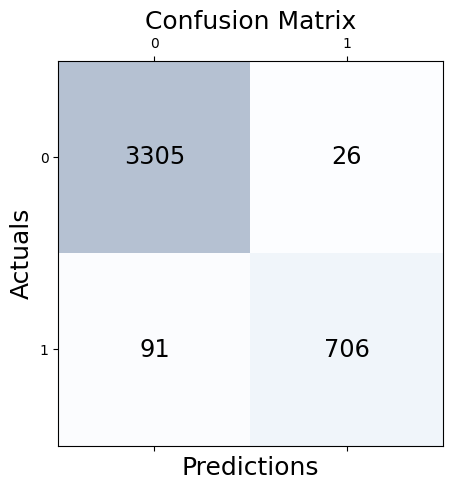

In [86]:
from sklearn.metrics import confusion_matrix
y_pred = rf_tuned.predict(X)
y_true = y
conf_matrix = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)